In [8]:
import pandas as pd
import seaborn as sns
from glob import glob
from natsort import natsorted
import numpy as np
import tifffile 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Regular cell (width = 1, length = 5, depth = 1)')

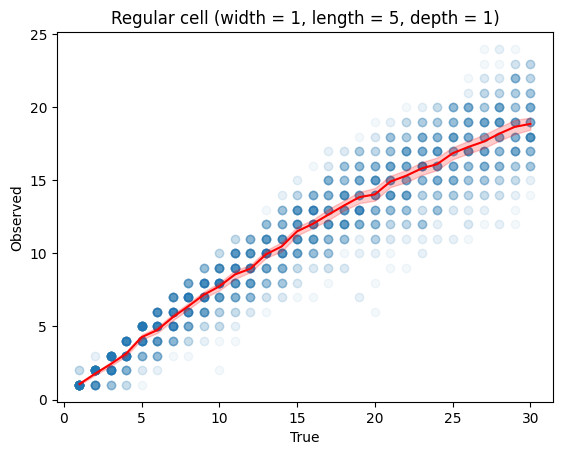

In [9]:
test_data_dirs = natsorted(glob("DEEPSTORM_test_data/*.tif"))

ground_truth_localisation = pd.read_csv("DEEPSTORM_test_data/SimulatedDataset.csv")

ground_truth_counts = pd.DataFrame(ground_truth_localisation["frame"].value_counts(ascending=True)).reset_index()
ground_truth_counts.columns = ["frame", "count"]
ground_truth_counts = ground_truth_counts.sort_values(by="frame").reset_index(drop=True)

frame_IDs = ground_truth_counts["frame"].unique()

predictions = []
for frame_ID in frame_IDs:
    _ = pd.read_csv(f"DEEPSTORM_test_data_predicted/Localizations_{str(frame_ID).zfill(4)}_test_avg.csv")
    _["frame"] = frame_ID
    predictions.append(
        _
    )

predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.45")["frame"].value_counts(ascending=True).reset_index()
predicted_counts.columns = ["frame", "count"]
predicted_counts = predicted_counts.sort_values(by="frame").reset_index(drop=True)

combined_data = pd.merge(ground_truth_counts, predicted_counts, on="frame")
combined_data.columns = ["frame", "True", "Observed"]

plt.scatter(combined_data["True"], combined_data["Observed"], alpha=0.05)
sns.lineplot(x = combined_data["True"], y = combined_data["Observed"], c = "r")
plt.title("Regular cell (width = 1, length = 5, depth = 1)")

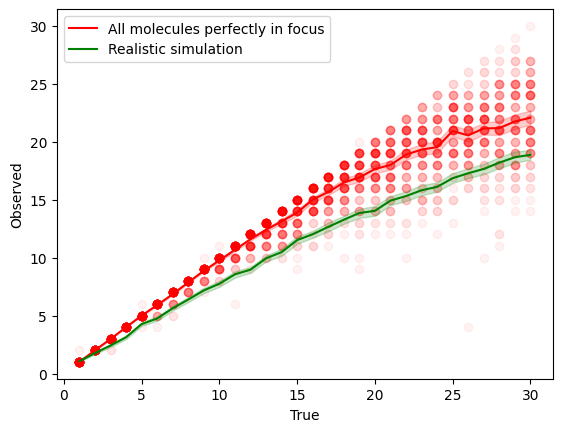

In [10]:
test_data_dirs = natsorted(glob("DEEPSTORM_test_data_no_DoF//*.tif"))

ground_truth_localisation = pd.read_csv("DEEPSTORM_test_data_no_DoF/SimulatedDataset.csv")

ground_truth_counts = pd.DataFrame(ground_truth_localisation["frame"].value_counts(ascending=True)).reset_index()
ground_truth_counts.columns = ["frame", "count"]
ground_truth_counts = ground_truth_counts.sort_values(by="frame").reset_index(drop=True)

frame_IDs = ground_truth_counts["frame"].unique()

predictions = []
for frame_ID in frame_IDs:
    try:
        _ = pd.read_csv(f"DEEPSTORM_test_data_no_DoF_predicted/Localizations_{str(frame_ID).zfill(4)}_test_avg.csv")
        _["frame"] = frame_ID
        predictions.append(
            _
        )
    except:
        pass

predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.46")["frame"].value_counts(ascending=True).reset_index()
predicted_counts.columns = ["frame", "count"]
predicted_counts = predicted_counts.sort_values(by="frame").reset_index(drop=True)

combined_data_no_DoF = pd.merge(ground_truth_counts, predicted_counts, on="frame")
combined_data_no_DoF.columns = ["frame", "True", "Observed"]

plt.scatter(combined_data_no_DoF["True"], combined_data_no_DoF["Observed"], alpha=0.05, c = "r")
sns.lineplot(x = combined_data_no_DoF["True"], y = combined_data_no_DoF["Observed"], c = "r")
sns.lineplot(x = combined_data["True"], y = combined_data["Observed"], c = "g")
plt.legend(["All molecules perfectly in focus", "Realistic simulation"])

Text(0.5, 1.0, 'MACS cell (width = 2, length = 5, depth = 0.6)')

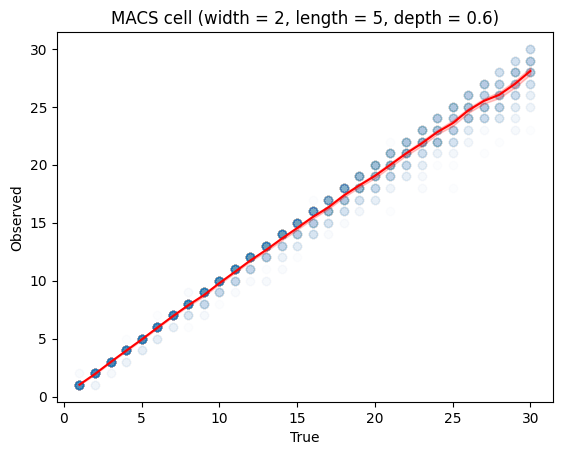

In [11]:
test_data_dirs = natsorted(glob("DEEPSTORM_MACS_test_data/*.tif"))

ground_truth_localisation = pd.read_csv("DEEPSTORM_MACS_test_data/SimulatedDataset.csv")

ground_truth_counts = pd.DataFrame(ground_truth_localisation["frame"].value_counts(ascending=True)).reset_index()
ground_truth_counts.columns = ["frame", "count"]
ground_truth_counts = ground_truth_counts.sort_values(by="frame").reset_index(drop=True)

frame_IDs = ground_truth_counts["frame"].unique()

predictions = []
for frame_ID in frame_IDs:
    _ = pd.read_csv(f"DEEPSTORM_MACS_test_data_predicted/Localizations_{str(frame_ID).zfill(4)}_test_avg.csv")
    _["frame"] = frame_ID
    predictions.append(
        _
    )

predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.45")["frame"].value_counts(ascending=True).reset_index()
predicted_counts.columns = ["frame", "count"]
predicted_counts = predicted_counts.sort_values(by="frame").reset_index(drop=True)

combined_data_MACS = pd.merge(ground_truth_counts, predicted_counts, on="frame")
combined_data_MACS.columns = ["frame", "True", "Observed"]

plt.scatter(combined_data_MACS["True"], combined_data_MACS["Observed"], alpha=0.01)
sns.lineplot(x = combined_data_MACS["True"], y = combined_data_MACS["Observed"], c = "r")
plt.title("MACS cell (width = 2, length = 5, depth = 0.6)")

In [12]:
test_data_dirs = natsorted(glob("DEEPSTORM_test_data_infinite_SNR///*.tif"))

ground_truth_localisation = pd.read_csv("DEEPSTORM_test_data_infinite_SNR/SimulatedDataset.csv")

ground_truth_counts = pd.DataFrame(ground_truth_localisation["frame"].value_counts(ascending=True)).reset_index()
ground_truth_counts.columns = ["frame", "count"]
ground_truth_counts = ground_truth_counts.sort_values(by="frame").reset_index(drop=True)

frame_IDs = ground_truth_counts["frame"].unique()

predictions = []
for frame_ID in frame_IDs:
    try:
        _ = pd.read_csv(f"DEEPSTORM_test_data_infinite_SNR/Localizations_{str(frame_ID).zfill(4)}_test_avg.csv")
        _["frame"] = frame_ID
        predictions.append(
            _
        )
    except:
        pass

predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.46")["frame"].value_counts(ascending=True).reset_index()
predicted_counts.columns = ["frame", "count"]
predicted_counts = predicted_counts.sort_values(by="frame").reset_index(drop=True)

combined_data_infinite_SNR = pd.merge(ground_truth_counts, predicted_counts, on="frame")
combined_data_infinite_SNR.columns = ["frame", "True", "Observed"]


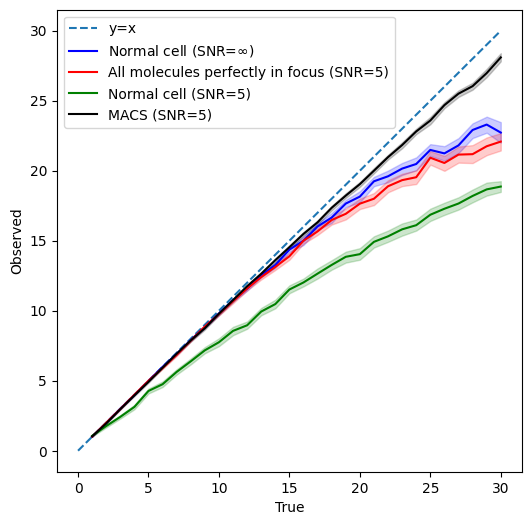

In [13]:
plt.figure(figsize=(6,6))
plt.plot([0,30],[0,30], linestyle="--")
#plt.scatter(combined_data_infinite_SNR["True"], combined_data_infinite_SNR["Observed"], alpha=0.05, c = "b")
sns.lineplot(x = combined_data_infinite_SNR["True"], y = combined_data_infinite_SNR["Observed"], c = "b")
sns.lineplot(x = combined_data_no_DoF["True"], y = combined_data_no_DoF["Observed"], c = "r")
sns.lineplot(x = combined_data["True"], y = combined_data["Observed"], c = "g")
sns.lineplot(x = combined_data_MACS["True"], y = combined_data_MACS["Observed"], c = "k")
plt.legend(["y=x", "Normal cell (SNR=$\infty$)", "All molecules perfectly in focus (SNR=5)", "Normal cell (SNR=5)", "MACS (SNR=5)"])

In [15]:
combined_data_MACS.to_pickle("combined_data_MACS.pickle")
combined_data_infinite_SNR.to_pickle("combined_data_infinite_SNR.picke")
combined_data_no_DoF.to_pickle("combined_data_no_DoF.pickle")
combined_data.to_pickle("combined_data_normal.pickle")